In [25]:
# Need to reverse the sequence because most recent apears first and oldest appears last
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot

from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


from pandas.plotting import lag_plot

from pandas import concat

from pandas.plotting import autocorrelation_plot

import pandas as pd
import numpy
import numpy as np
from numpy import sqrt 
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg
from random import random

from pandas import DataFrame
from pandas import concat

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pandas.plotting import lag_plot



In [34]:
#df = pd.read_csv("00221634_entries_2018-03-01_to_2018-08-05.csv", header=None)
# df = pd.read_csv("test.csv")
# df = pd.read_csv("309157_data.csv")
df = pd.read_csv("test_no_null.csv")
df.head

# Make two copies to extract 
# (i) endogenous variable BG and 
# (ii) exogenous variables insulin and carbs

# Coumns in the input file:
# 0: entryid, 1: subjectid, 2: timestamp, 3: bg, 4: insulin, 5: carbs

# Remove all columns except BG to keep only endogenous variable BG: 
df_endogenous = df.drop(['entryid', 'subjectid', 'timestamp', 'insulin', 'carbs'], axis=1)
#df_endogenous=df1.drop(df1.columns[[0, 1, 2, 4, 5]], axis=1,  inplace=True)
print('Endogenous Data (BG)...')
print(df_endogenous.head)

# Remove all columns except BG to keep only endogenous variable BG: 
df_exogenous = df.drop(['entryid', 'subjectid', 'timestamp', 'bg'], axis=1)
print('Exogenous Data (insulin and carbs)...')
print(df_exogenous.head)



Endogenous Data (BG)...
<bound method NDFrame.head of         bg
0       69
1      199
2      204
3      208
4      215
...    ...
59056  126
59057  127
59058  128
59059  128
59060   85

[59061 rows x 1 columns]>
Exogenous Data (insulin and carbs)...
<bound method NDFrame.head of        insulin  carbs
0          0.0      0
1          0.0      0
2          0.0      0
3          0.0      0
4          0.0      0
...        ...    ...
59056      0.0      0
59057      0.0      0
59058      0.0      0
59059      0.0      1
59060      0.0      0

[59061 rows x 2 columns]>


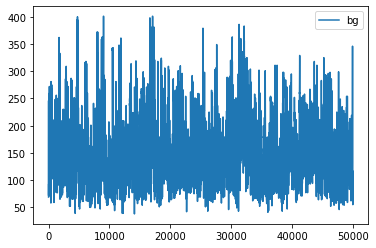

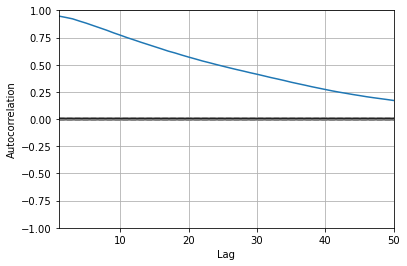

In [35]:

# Select first N entries for training and testing
N = 50000
# N = 59000

df_endogenous_numeric = df_endogenous.apply(pd.to_numeric, errors='coerce')
df_endogenous_numeric_selected=df_endogenous_numeric.head(N)
df_endogenous_numeric_selected.plot()
pyplot.show()

df_exogenous_numeric = df_exogenous.apply(pd.to_numeric, errors='coerce')
df_exogenous_numeric_selected=df_exogenous_numeric.head(N)


autocorrelation_plot(df_endogenous_numeric_selected)
pyplot.xlim(1,50)
pyplot.show()

# Try selected BG samples of a user
data_endogenous = numpy.array(df_endogenous_numeric_selected)
data_exogenous = numpy.array(df_exogenous_numeric_selected)

num_test_samples=8000
# num_test_samples=8000
train_endogenous, test_endogenous = data_endogenous[1:len(data_endogenous)-num_test_samples], data_endogenous[len(data_endogenous)-num_test_samples:]
train_exogenous, test_exogenous = data_exogenous[1:len(data_exogenous)-num_test_samples], data_exogenous[len(data_exogenous)-num_test_samples:]



In [39]:
from pmdarima.arima import auto_arima

#model_ARIMAX = auto_arima(train_endogenous, exogenous=train_exogenous, trace=True, error_action="ignore", suppress_warnings=True)
model_ARIMAX = auto_arima(train_endogenous, xreg=train_exogenous, trace=True, error_action="ignore", suppress_warnings=True)

model_ARIMAX.fit(train_endogenous, xreg=train_exogenous)

forecast_ARIMAX = model_ARIMAX.predict(n_periods=num_test_samples, xreg=test_exogenous)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=358202.032, Time=35.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=459527.321, Time=0.68 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=366066.581, Time=1.51 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=423251.521, Time=8.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=547721.735, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=358589.318, Time=14.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=358685.891, Time=19.94 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=358195.631, Time=49.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=358419.077, Time=13.86 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=358394.649, Time=65.99 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=358188.214, Time=73.55 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=358193.044, Time=64.63 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=358165.591, Time=85.27 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=358242.637, Time=100.5

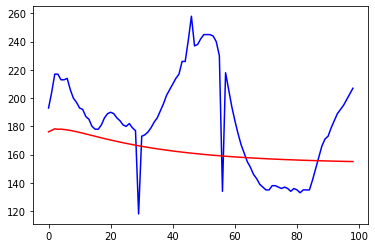

Results for the ARIMAX Model...
rmse_test_dataset: 49.475922929347945
mae_test_dataset: 40.09709817689701
mape_test_dataset: 0.3170873158617483


In [44]:
#plot the predictions for the test set
plt.plot(test_endogenous[0:99], label='Test (Desired Output)', color='blue')
plt.plot(forecast_ARIMAX[0:99], label='Prediction (Forecast)', color='red')
plt.show()

print('Results for the ARIMAX Model...')

rmse_test_dataset = sqrt(mean_squared_error(test_endogenous, forecast_ARIMAX))
print('rmse_test_dataset:', rmse_test_dataset)

mae_test_dataset= mean_absolute_error(test_endogenous, forecast_ARIMAX)
print('mae_test_dataset:', mae_test_dataset)

mape_test_dataset= mean_absolute_percentage_error(test_endogenous, forecast_ARIMAX)
print('mape_test_dataset:', mape_test_dataset)

C:\Users\kntri\anaconda3new\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


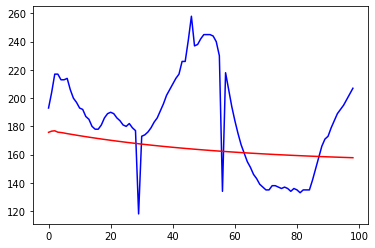

Results for the AR Model...
rmse_test_dataset: 49.47279509402026
mae_test_dataset: 40.10803411841435
mape_test_dataset: 0.3176275346116331


In [45]:
# AutoRegressive Model for this new data set
#model_ARIMA = auto_arima(train_endogenous, xreg=train_exogenous, trace=True, error_action="ignore", suppress_warnings=True)
# model_ARIMA.fit(train_endogenous, xreg=train_exogenous)
# forecast_ARIMA = model_ARIMAX.predict(n_periods=num_test_samples, xreg=test_exogenous)

# fit model
# 12
target_lags=4
model_AR = AutoReg(train_endogenous, lags=target_lags)
model_AR_fit = model_AR.fit()
# let's make prediction
forecast_AR = model_AR_fit.predict(len(train_endogenous), len(train_endogenous)+num_test_samples-1)
#print(forecast)

#plot the predictions for the test set
plt.plot(test_endogenous[0:99], label='Test (Desired Output)', color='blue')
plt.plot(forecast_AR[0:99], label='Prediction (Forecast)', color='red')
plt.show()

print('Results for the AR Model...')

rmse_test_dataset = sqrt(mean_squared_error(test_endogenous, forecast_AR))
print('rmse_test_dataset:', rmse_test_dataset)

mae_test_dataset= mean_absolute_error(test_endogenous, forecast_AR)
print('mae_test_dataset:', mae_test_dataset)

mape_test_dataset= mean_absolute_percentage_error(test_endogenous, forecast_AR)
print('mape_test_dataset:', mape_test_dataset)


In [ ]:
#model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
#model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

#forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
#df_valid["Forecast_ARIMAX"] = forecast
